In [123]:
import os

cwd = os.getcwd()
print(cwd)

C:\Users\akash\chest_xray


In [87]:
import os

new_directory = 'C://Users//akash//chest_xray//pred//COVID'
os.chdir(new_directory)

In [88]:
import os

cwd = os.getcwd()
print(cwd)

C:\Users\akash\chest_xray\pred\COVID


In [115]:
import os
import pathlib

# Some basic libraries that help us create dataframes and visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
plt.style.use("fivethirtyeight")
%matplotlib inline

# Importing Deep Learning Libraries 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

# Tensorflow and Keras Version
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

# To Suppress any Un-necessary warnings
import warnings
warnings.filterwarnings('ignore')

Tensorflow Version: 2.10.0
Keras Version: 2.10.0


In [116]:
# Here, we define the paths where we have our data for training, testing and predictions
data_dir_train = pathlib.Path('C://Users//akash//chest_xray//train')
data_dir_test = pathlib.Path('C://Users//akash//chest_xray//test')
data_dir_val = pathlib.Path('C://Users//akash//chest_xray//pred')

In [117]:
# Checking the number images in all the paths defined above
print("Number of Images in Train:", len(list(data_dir_train.glob("*/*.jpeg"))))
print("Number of Images in Test:", len(list(data_dir_test.glob("*/*.jpeg"))))
print("Number of Images in Validation:", len(list(data_dir_val.glob("*/*.jpeg"))))

Number of Images in Train: 7315
Number of Images in Test: 620
Number of Images in Validation: 8


In [118]:
# Here, we are defining some variables which will be commonly used in the further codes
height = 150
width = 150
batch_size = 16
seed = 42 # For reproducibility 

In [119]:
# Next! In this step, we are going to use the method "image_dataset_from_directory()" to construct a dataset!

# First we ask Keras to create a "training" dataset with 0.2 as validation split.

train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='training',
image_size=(height,width),
batch_size=batch_size)

Found 7315 files belonging to 2 classes.
Using 5852 files for training.


In [120]:
# Second we ask Keras to create a "validation" dataset with 0.2 as validation split.

val_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='validation',
image_size=(height,width),
batch_size=batch_size)

Found 7315 files belonging to 2 classes.
Using 1463 files for validation.


In [121]:
# Finally we are storing all the available class names from the dataset. (NORMAL and COVID)

# This also ensures, we have created the dataset successfully!

class_names = train_ds.class_names
class_names

['COVID', 'NORMAL']

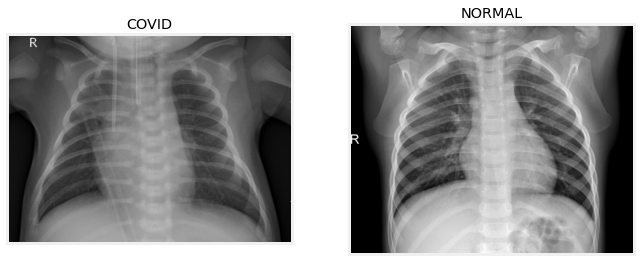

In [122]:
# Defining the Canvas size
plt.figure(figsize=[10,8])

# Next we are just picking one image from the unique categories and displaying them:
for index, classes in enumerate(class_names):
    for images in train_ds.file_paths:
        if classes in images:
            img = image.imread(images)
            plt.subplot(1,2,index+1)
            plt.imshow(img, cmap=plt.cm.gist_gray)
            plt.xticks([])
            plt.yticks([])
            plt.title(str(classes))
            break
plt.show()

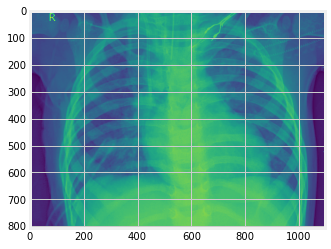

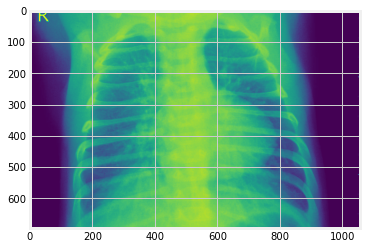

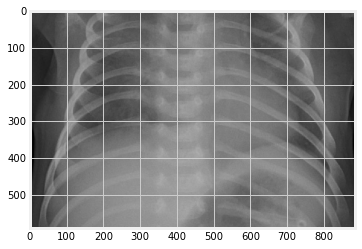

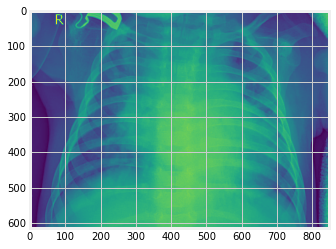

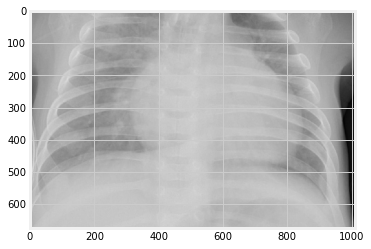

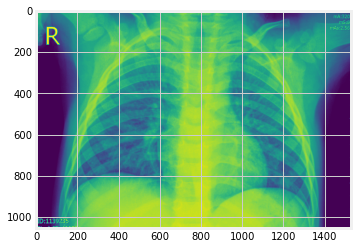

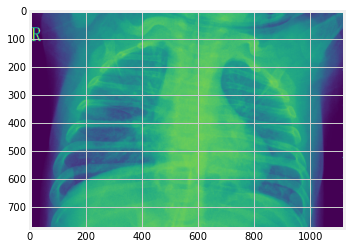

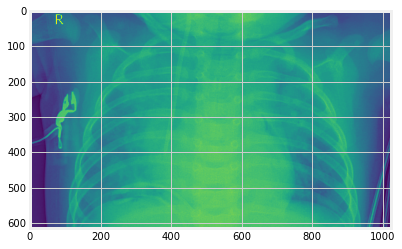

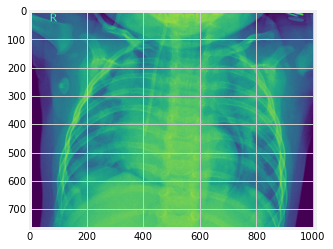

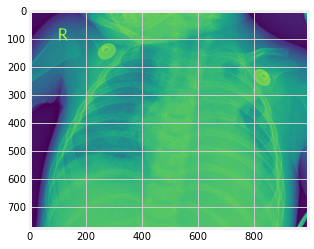

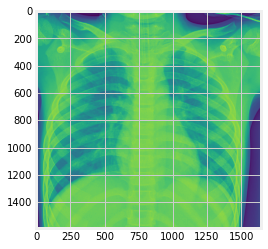

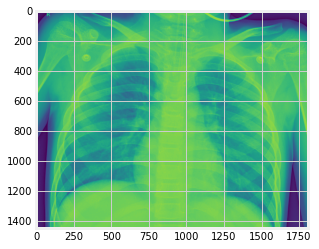

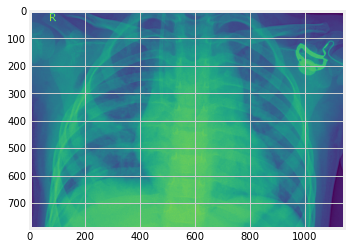

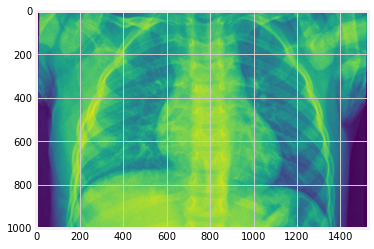

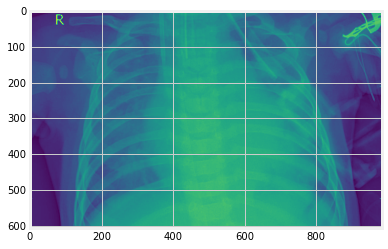

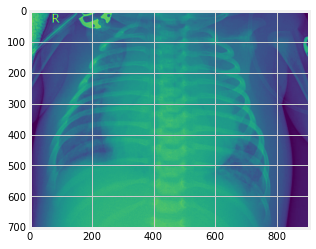

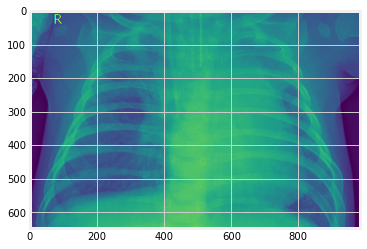

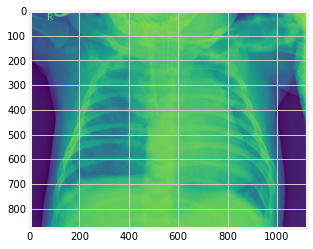

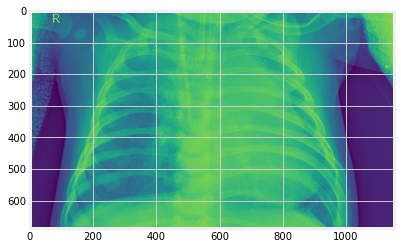

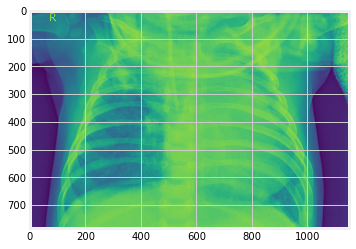

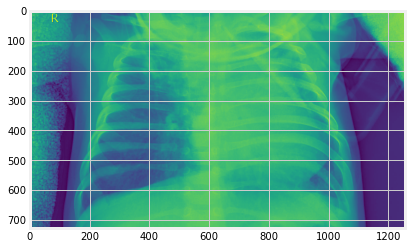

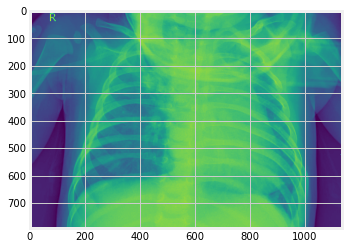

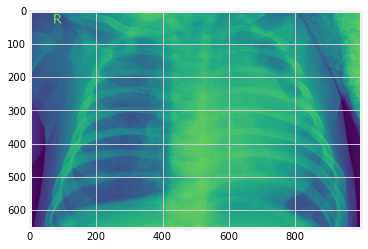

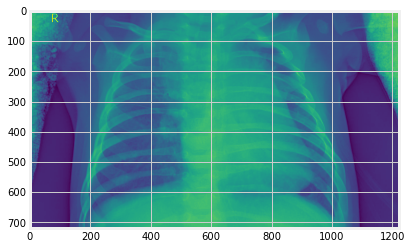

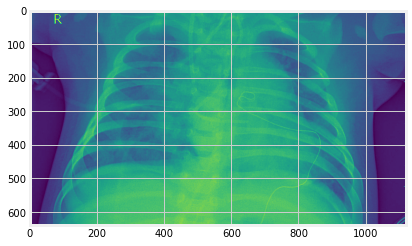

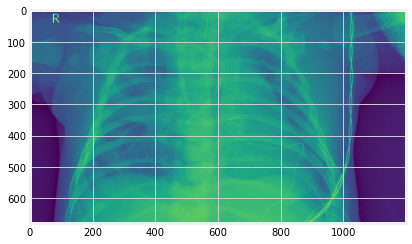

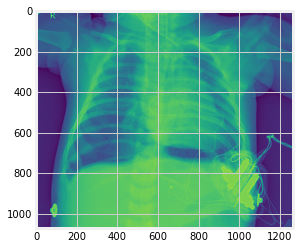

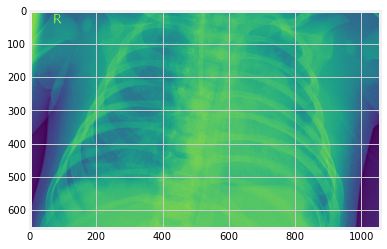

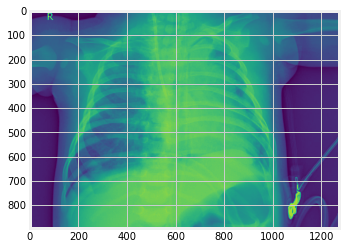

In [244]:
import pandas as pd
from PIL import Image

image_path = 'C:\\Users\\akash\\chest_xray\\train\\COVID'
# Load images and store them in a list
images = []
for i in range(1,30):
    image = Image.open(image_path+"/PNEUMONIA_{}.jpeg".format(i))
    images.append(image)
    
#Visualizing the images
    im_array = np.array(image)
    plt.imshow(im_array)
    plt.show()


In [184]:
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=L size=1096x808 at 0x1D99C30E070>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1056x696 at 0x1D99C5AD190>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=885x592 at 0x1D9A227D2B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=848x616 at 0x1D99294E580>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1010x676 at 0x1D9946963A0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1528x1056 at 0x1D9A29435B0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1120x776 at 0x1D9A2FCA4C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1024x616 at 0x1D9A2269940>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1008x768 at 0x1D9A3416880>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=992x776 at 0x1D9A5C890A0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1648x1592 at 0x1D9A5CF0310>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1808x1448 at 0x1D9A5C9D8B0>,
 <PIL.JpegIm

In [252]:
images = [np.array(img) for img in images]
images = [np.array(img) if len(img.shape) >= 3 else np.array(img)[..., np.newaxis] for img in images]
for i, img in enumerate(images):
    print("Image {} has shape: {}".format(i, img.shape))

Image 0 has shape: (808, 1096, 1)
Image 1 has shape: (696, 1056, 1)
Image 2 has shape: (592, 885, 3)
Image 3 has shape: (616, 848, 1)
Image 4 has shape: (676, 1010, 3)
Image 5 has shape: (1056, 1528, 1)
Image 6 has shape: (776, 1120, 1)
Image 7 has shape: (616, 1024, 1)
Image 8 has shape: (768, 1008, 1)
Image 9 has shape: (776, 992, 1)
Image 10 has shape: (1592, 1648, 1)
Image 11 has shape: (1448, 1808, 1)
Image 12 has shape: (792, 1144, 1)
Image 13 has shape: (1001, 1526, 1)
Image 14 has shape: (608, 984, 1)
Image 15 has shape: (704, 904, 1)
Image 16 has shape: (648, 984, 1)
Image 17 has shape: (880, 1120, 1)
Image 18 has shape: (688, 1152, 1)
Image 19 has shape: (784, 1152, 1)
Image 20 has shape: (728, 1256, 1)
Image 21 has shape: (792, 1136, 1)
Image 22 has shape: (656, 1000, 1)
Image 23 has shape: (720, 1224, 1)
Image 24 has shape: (640, 1120, 1)
Image 25 has shape: (680, 1200, 1)
Image 26 has shape: (1072, 1264, 1)
Image 27 has shape: (656, 1056, 1)
Image 28 has shape: (896, 1272,

In [253]:
import pandas as pd
from PIL import Image
import numpy as np

# Load images and store them in a list
images = []

labels = []
for i in range(1,30):
    image = Image.open(image_path+"/PNEUMONIA_{}.jpeg".format(i))
    images.append(image)

# Create a DataFrame
df = pd.DataFrame({"Image": images})

# Calculate mean pixel values for each image and add to the DataFrame
df["Mean_Pixel_Values"] = [np.mean(np.array(img)) for img in df["Image"]]

# Perform EDA
# For example, get the mean pixel values of the first image
mean_pixel_values = df["Mean_Pixel_Values"].iloc[0]
print("Mean pixel values:", mean_pixel_values)

Mean pixel values: 118.63259625460721


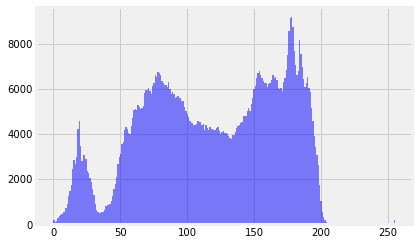

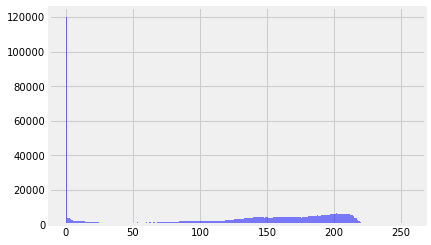

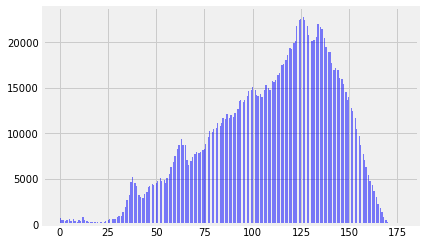

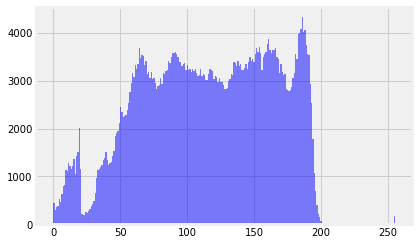

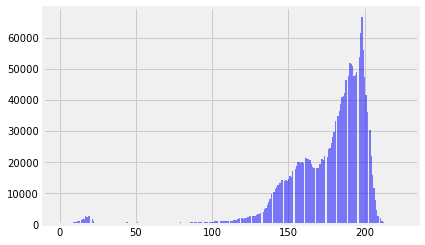

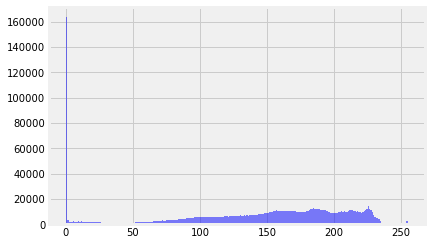

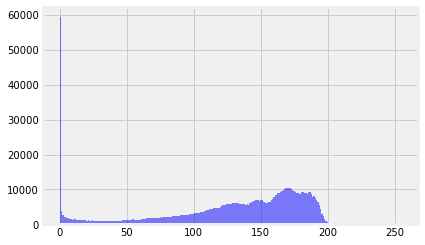

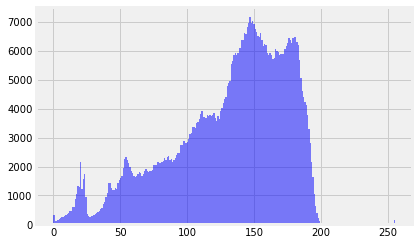

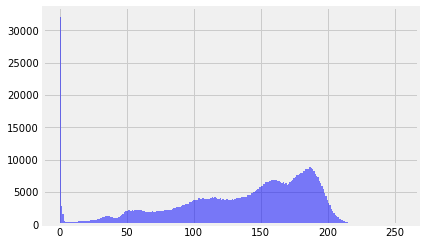

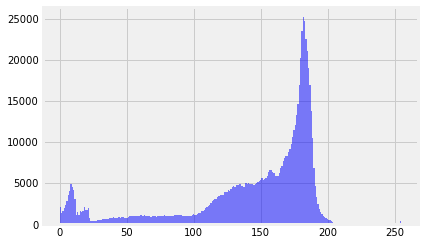

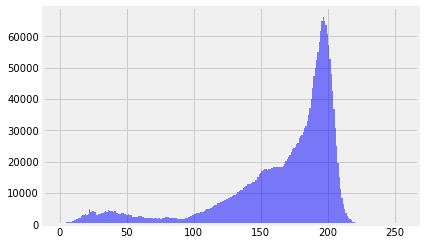

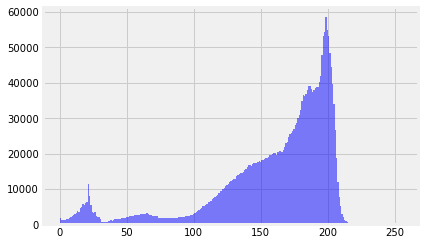

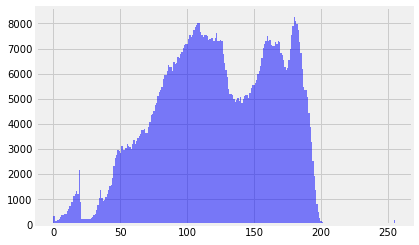

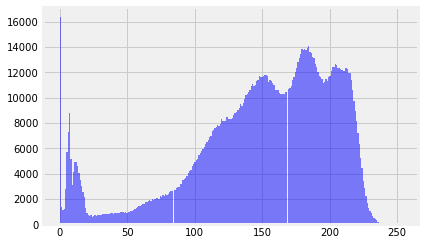

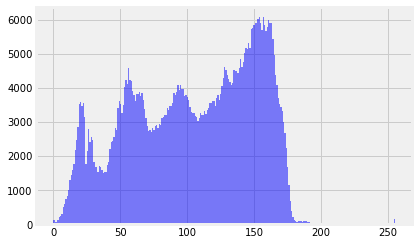

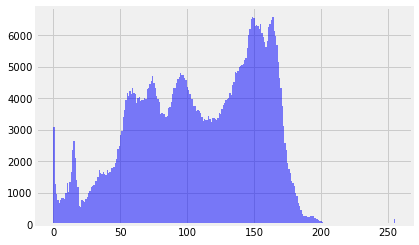

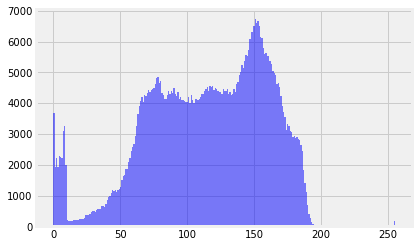

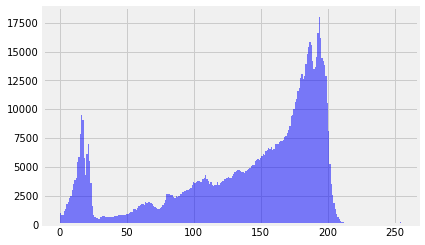

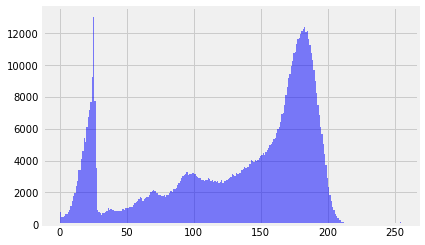

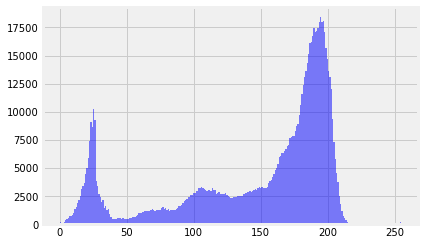

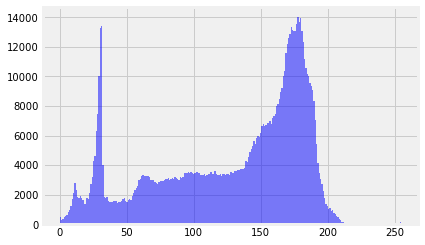

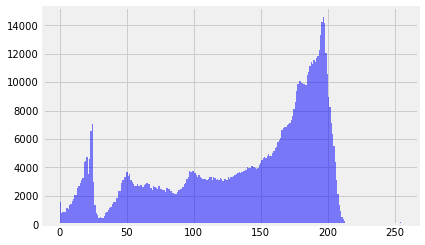

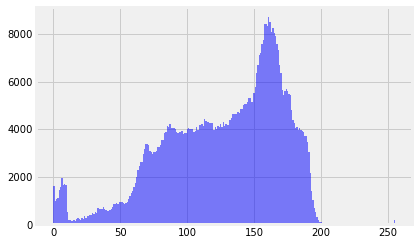

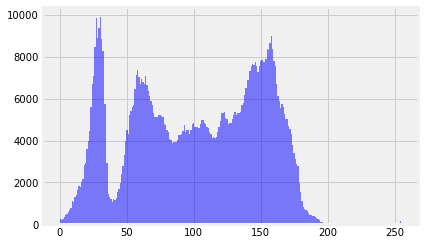

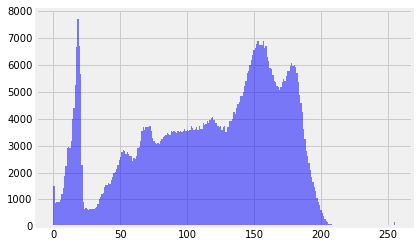

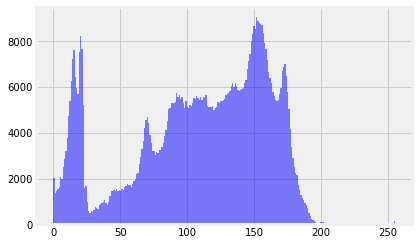

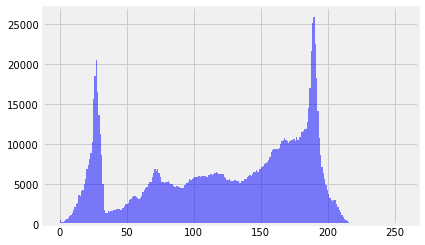

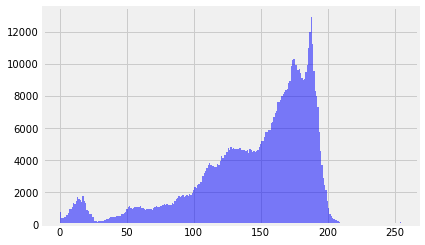

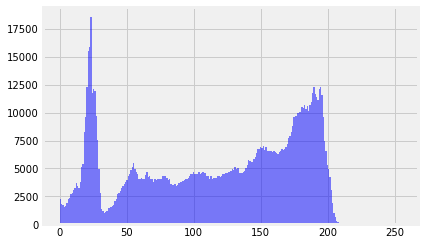

In [255]:
# Plotting histogram of pixel values
images = np.array(images)
images = images.reshape(images.shape[0], -1)

images = np.array(images)

for i in range(len(images)):
    plt.hist(images[i].ravel(), bins=256, color='blue', alpha=0.5)
    plt.show()

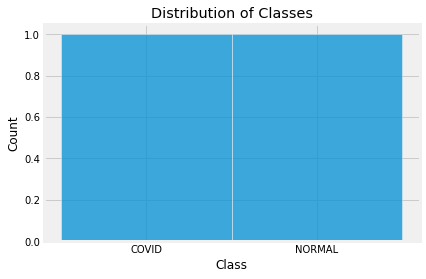

In [257]:
# Plot a histogram of the labels to see the distribution of the classes
labels = np.array(class_names)
sns.histplot(labels, kde=False)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()






# CNN model

In [97]:
# Here we start building our model in Keras:

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2)
])

In [98]:
# Next we compile this model where we define the optimizer, loss function and the metric which we will use to evaluate.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [99]:
!pip install visualkeras

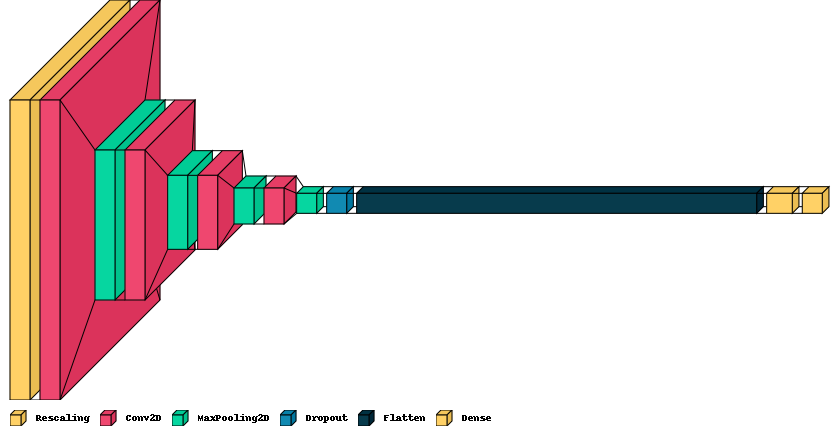

In [114]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=2, legend=True)

In [272]:
# Finally we are going to train our model for 20 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
366/366 [==============================] - 90s 244ms/step - loss: 0.1345 - accuracy: 0.9494 - val_loss: 0.1379 - val_accuracy: 0.9474
Epoch 2/20
366/366 [==============================] - 71s 193ms/step - loss: 0.1134 - accuracy: 0.9564 - val_loss: 0.1308 - val_accuracy: 0.9528
Epoch 3/20
366/366 [==============================] - 75s 204ms/step - loss: 0.0990 - accuracy: 0.9634 - val_loss: 0.1569 - val_accuracy: 0.9453
Epoch 4/20
366/366 [==============================] - 76s 207ms/step - loss: 0.0822 - accuracy: 0.9713 - val_loss: 0.0929 - val_accuracy: 0.9692
Epoch 5/20
366/366 [==============================] - 85s 232ms/step - loss: 0.0747 - accuracy: 0.9732 - val_loss: 0.1002 - val_accuracy: 0.9665
Epoch 6/20
366/366 [==============================] - 69s 188ms/step - loss: 0.0583 - accuracy: 0.9795 - val_loss: 0.1025 - val_accuracy: 0.9645
Epoch 7/20
366/366 [==============================] - 64s 174ms/step - loss: 0.0585 - accuracy: 0.9793 - val_loss: 0.0965 - val_ac

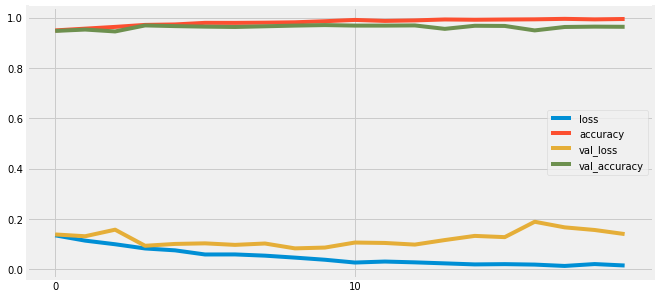

In [273]:
# Next we are going to plot a graph to check the loss and accuracy as the model trained for 20 epochs for both train and validation.
pd.DataFrame(history.history).plot(figsize=[10,5])
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,10,2))
plt.show()

# Evaluating the model

In [274]:
# To evaluate our model, we are going to make use of the "test" dataset
test_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_test,
seed=seed,
image_size=(height,width),
batch_size=batch_size)

Found 620 files belonging to 2 classes.


In [275]:
model.evaluate(test_ds, batch_size=batch_size)

39/39 [==============================] - 2s 47ms/step - loss: 0.2240 - accuracy: 0.9500


[0.22397352755069733, 0.949999988079071]

# Saving Our Model

In [276]:
model.save("./xray_model.h5")

In [277]:
cwd = os.getcwd()
print(cwd)

C:\Users\akash\chest_xray


# Prediction Using the Model

1/1 [==============================] - 0s 87ms/step


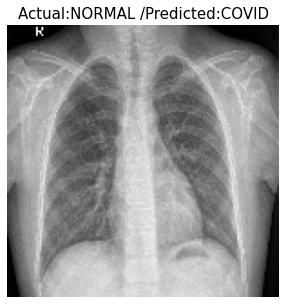

In [278]:
# Loading the .h5 model that we had saved in the previous step:
my_xray_cnnmodel = keras.models.load_model("./xray_model.h5")

# Defining an image path from the "pred" folder:
image_path = 'C:\\Users\\akash\\chest_xray\\pred\\NORMAL\\NORMAL_2.jpeg'

# Preprocessing the image to 150x150x3 size and predicting the label:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(150,150,3))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = my_xray_cnnmodel.predict(input_arr)

classes = ['NORMAL', 'COVID']

actual = ''

for class_name in classes:
    if class_name in image_path:
        actual = class_name

pred = classes[np.argmax(predictions, axis=1)[0]]

# Finally we are displaying the predicted outcome:
plt.figure(figsize=[8,5])
plt.imshow(image, cmap='gray')
plt.title("Actual:"+actual+" /Predicted:"+pred, size=15)
plt.axis('off')
plt.show()

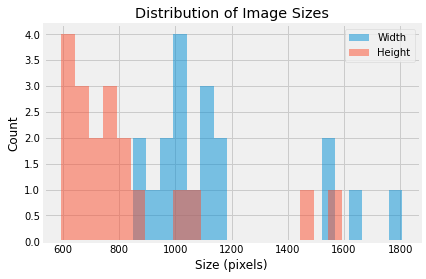

In [113]:
sizes = [img.size for img in images]
widths = [size[0] for size in sizes]
heights = [size[1] for size in sizes]
plt.hist(widths, bins=20, alpha=0.5, label="Width")
plt.hist(heights, bins=20, alpha=0.5, label="Height")
plt.legend()
plt.xlabel("Size (pixels)")
plt.ylabel("Count")
plt.title("Distribution of Image Sizes")
plt.show(